In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
img_array = cv2.imread("DATA/0/Training_15950.jpg")

In [4]:
img_array.shape

(48, 48, 3)

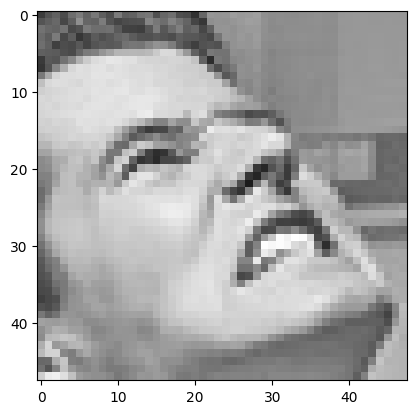

In [5]:
plt.imshow(img_array)

In [6]:
data_dir = 'DATA/'
class_names = ["0","1","2","3","4","5","6"]

batch_size = 32
img_height = 224
img_width = 224

training_data = []

def create_training_data():
    for category in class_names:
        path = os.path.join(data_dir, category)
        class_num = class_names.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_height, img_width))
                training_data.append([new_array, class_num])
            except Exception as error:
                pass

In [7]:
create_training_data()

print(len(training_data))

28709


In [8]:
import random

random.shuffle(training_data)

In [9]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_height, img_width, 3)

In [10]:
x.shape

(28709, 224, 224, 3)

In [11]:
x = x/255.0

In [12]:
y[0]

0

In [13]:
Y = np.array(y)

In [14]:
Y.shape

(28709,)

In [15]:
from tensorflow import keras
from tensorflow.keras import layers


In [16]:

model = tf.keras.applications.MobileNetV2()

In [17]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [18]:
base_input = model.layers[0].input

In [19]:
base_output = model.layers[-2].output

In [20]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [21]:
Y.shape

(28709,)

In [22]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense('7', activation='softmax')(final_output)

In [23]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [24]:
custom_model = keras.Model(inputs = base_input, outputs= final_output)

In [25]:
custom_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [28]:
custom_model.compile(
  optimizer='adam',
  loss="sparse_categorical_crossentropy",
  metrics=['accuracy'])

In [30]:
with tf.device('/cpu:0'):
    custom_model.fit(x, Y, epochs=25)

Epoch 1/25
898/898 [==============================] - 685s 758ms/step - loss: 1.2532 - accuracy: 0.5263
Epoch 2/25
898/898 [==============================] - 662s 737ms/step - loss: 1.0737 - accuracy: 0.6001
Epoch 3/25
898/898 [==============================] - 666s 742ms/step - loss: 1.0018 - accuracy: 0.6270
Epoch 4/25
898/898 [==============================] - 662s 737ms/step - loss: 0.9443 - accuracy: 0.6493
Epoch 5/25
898/898 [==============================] - 648s 722ms/step - loss: 0.8904 - accuracy: 0.6705
Epoch 6/25
898/898 [==============================] - 648s 722ms/step - loss: 0.8425 - accuracy: 0.6853
Epoch 7/25
898/898 [==============================] - 644s 717ms/step - loss: 0.7876 - accuracy: 0.7103
Epoch 8/25
898/898 [==============================] - 656s 730ms/step - loss: 0.7466 - accuracy: 0.7260
Epoch 9/25
898/898 [==============================] - 651s 724ms/step - loss: 0.6906 - accuracy: 0.7483
Epoch 10/25
898/898 [==============================] - 654s 728m

In [31]:
custom_model.save('custom_model_45322.h5')

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.__version__

'2.10.0'

In [3]:
custom_model = tf.keras.models.load_model('custom_model_45322.h5')

In [7]:
frame = cv2.imread("angrygirls.jpg")

In [8]:
frame.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

NameError: name 'plt' is not defined

In [36]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [37]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [38]:
gray.shape

(650, 1500)

In [10]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not Detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex +ew]

NameError: name 'faceCascade' is not defined

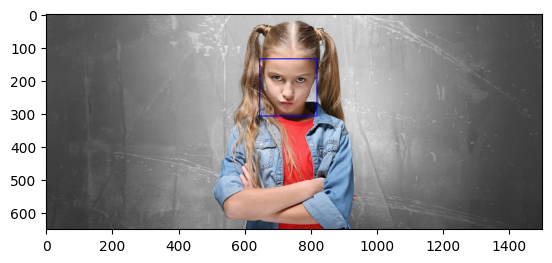

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

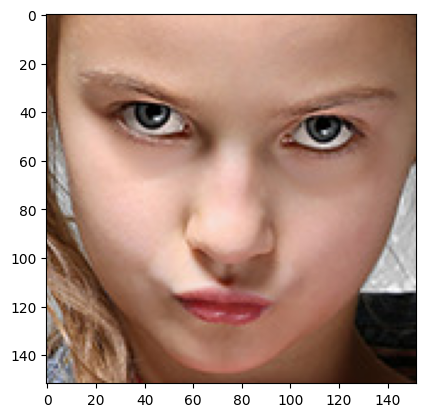

In [41]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [4]:
fImage = cv2.resize(face_roi, (224, 224))
fImage = np.expand_dims(fImage, axis = 0)
fImage = fImage/225.0

NameError: name 'face_roi' is not defined

In [43]:
Pred = custom_model.predict(fImage)

1/1 [==============================] - 5s 5s/step


In [44]:
Pred[0]

array([3.0878730e-04, 2.5377985e-02, 2.2271052e-03, 5.1402842e-04,
       3.6128929e-03, 4.4958354e-03, 9.6346343e-01], dtype=float32)

In [45]:
np.argmax(Pred)

6

In [ ]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "DOME"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=2)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness =1)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Not camera")

while True:
    ref, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not Detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex +ew]

    fImage = cv2.resize(face_roi, (224, 224))
    fImage = np.expand_dims(fImage, axis = 0)
    fImage = fImage/225.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    Pred = custom_model.predict(fImage)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if(np.argmax(Pred) ==0):
        emotion = "SURPRISE"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, emotion, (x1 + int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, emotion, (100,150), font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    elif(np.argmax(Pred) ==1):
        emotion = "SAD"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, emotion, (x1 + int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, emotion, (100,150), font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    elif(np.argmax(Pred) ==3):
        emotion = "HAPPY"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, emotion, (x1 + int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, emotion, (100,150), font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    elif(np.argmax(Pred) ==4):
        emotion = "FEAR"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, emotion, (x1 + int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, emotion, (100,150), font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    elif(np.argmax(Pred) ==5):
        emotion = "DISGUST"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, emotion, (x1 + int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, emotion, (100,150), font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    elif(np.argmax(Pred) ==6):
        emotion = "ANGRY"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, emotion, (x1 + int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, emotion, (100,150), font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    else:
        emotion = "NEUTRAL"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, emotion, (x1 + int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, emotion, (100,150), font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))

    cv2.imshow('Emotion Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 14ms/step
Face not Detected
1/1 [==============================] - 0s 14ms/step
Face not Detected
1/1 [==============================] - 0s 14ms/step
Face not Detected
1/1 [==============================] - 0s 14ms/step
Face not Detected
1/1 [==============================] - 0s 13ms/step
Face not Detected
1/1 [==============================] - 0s 13ms/step
Face not Detected
1/1 [==============================] - 0s 13ms/step
Face not Detected
1/1 [==============================] - 0s 14ms/step
Face not Detected
Face not Detected
1/1 [==============================] - 0s 13ms/step
Face not Detected
1/1 [==============================] - 0s 15ms/step
Face not Detected
1/1 [==============================] - 0s 13ms/step
Face not Detected
1/1 [==============================] - 0s 13ms/step
Face not Detected
1/1 [==============================] - 0s 14ms/step
Face not Detected
1/1 [==============================] - 0s 12ms/step
Face not Detected
1/

In [ ]:
model = tf.keras.models.load_model('mi_modelo_entrenado')
class_names = ['0', '1', '2','3','4', '5', '6']

cap = cv2.VideoCapture(0)

def preprocess(frame, model):
    target_size = (model.input_shape[1], model.input_shape[2])
    frame = cv2.resize(frame, target_size)
    frame = frame / 255.0
    return frame

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame_processed = preprocess(frame, model)
    prediction = model.predict(np.expand_dims(frame_processed, axis=0))
    probabilities = tf.nn.softmax(prediction[0])
    predicted_class = np.argmax(probabilities)
    confidence = np.max(probabilities) * 100
    emotion = class_names[predicted_class]

    cv2.putText(frame, f'{emotion}: {confidence:.2f}%', (10, frame.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2.imshow('Emotion Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()